In [1]:
import numpy as np
import os
from os.path import join as jn
from tqdm.auto import tqdm

In [2]:
dict_dataset = {}

In [3]:
dataset_path = 'data/video/pressure/test/'

In [4]:
for id in tqdm(os.listdir(dataset_path)):
    for number in os.listdir(jn(dataset_path, id)):
        data = np.load(jn(dataset_path, id, number, 'prepared.npz'))['arr_0']
        dict_dataset[id+"_"+number] = data

  0%|          | 0/16 [00:00<?, ?it/s]

In [5]:
np.savez_compressed(jn(dataset_path, "test.npz"), **dict_dataset)

In [8]:
test = np.load(jn(dataset_path, "test.npz"))
len(test.files)/64

16.0

In [9]:
dict_dataset = {}

In [10]:
dataset_path = 'data/video/pressure/train/'

In [11]:
for id in tqdm(os.listdir(dataset_path)):
    for number in os.listdir(jn(dataset_path, id)):
        data = np.load(jn(dataset_path, id, number, 'prepared.npz'))['arr_0']
        dict_dataset[id+"_"+number] = data

  0%|          | 0/174 [00:00<?, ?it/s]

In [12]:
np.savez_compressed(jn(dataset_path, "train.npz"), **dict_dataset)

In [13]:
test = np.load(jn(dataset_path, "train.npz"))
len(test.files)/64

174.0

## Gausses adding

In [2]:
import numpy as np
import os
from os.path import join as jn
from tqdm.auto import tqdm

In [3]:
import h5py
import hdf5plugin

In [14]:
gaus_data = np.load("../average_dataset/data/pressure/pic/0.npy")

In [15]:
gaus_data.max()

5.2064366

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as jn
import os
import yaml
import torch
from torchinfo import summary
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, Dataset


In [17]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)


In [18]:
config['sim']['test_mod'] = True

In [19]:
import torch_sensor_lib as tsl
sim = tsl.FiberSimulator(config)

Rot tensors


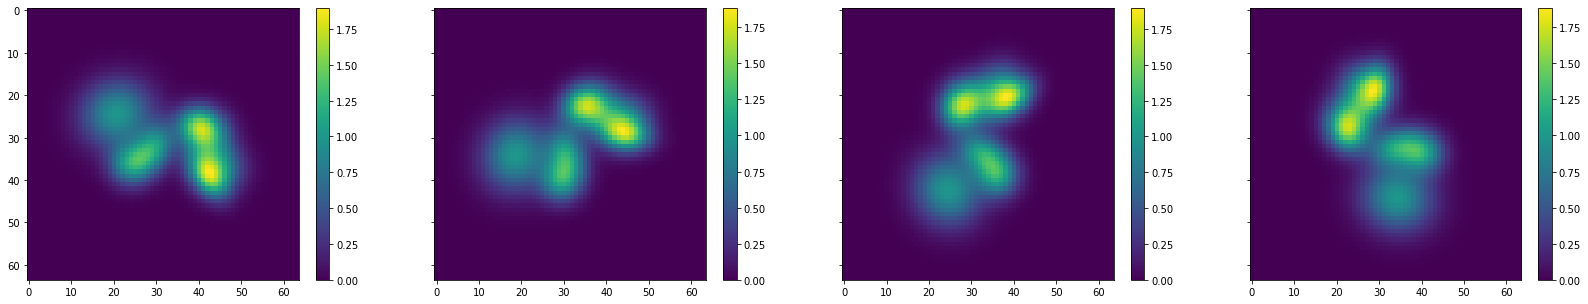

After blur


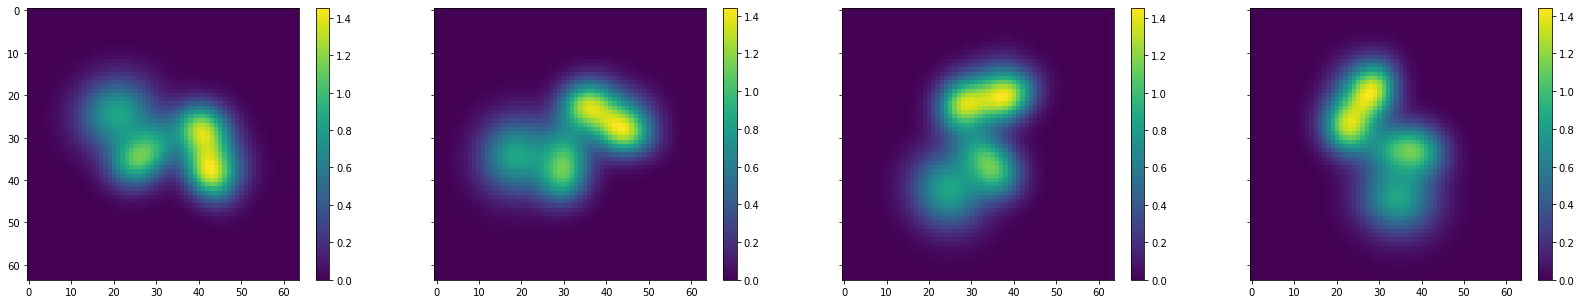

Loss in fiber


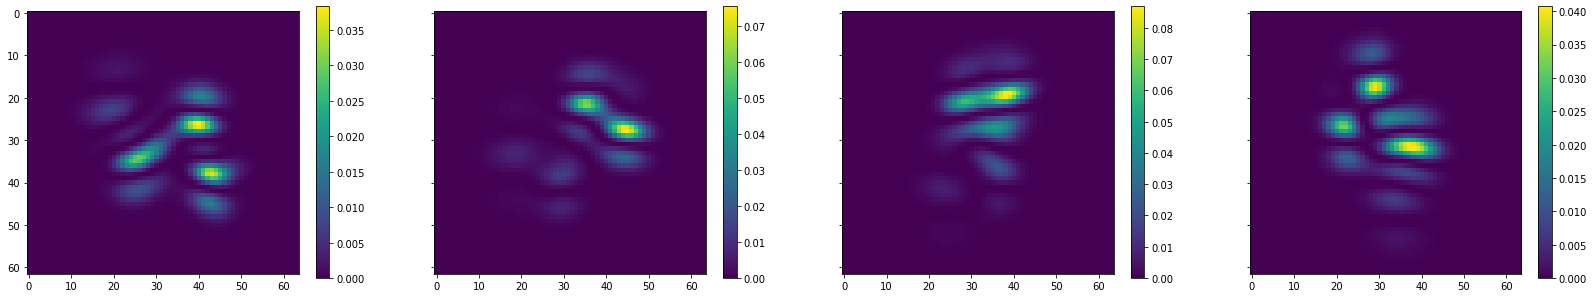

Loss sums


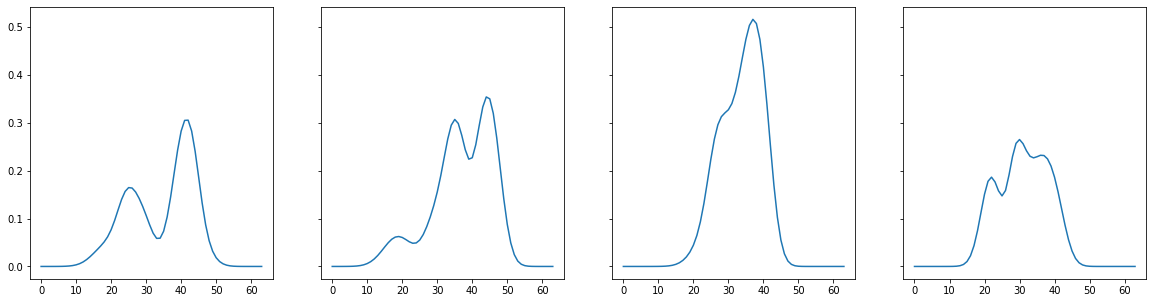

Signal


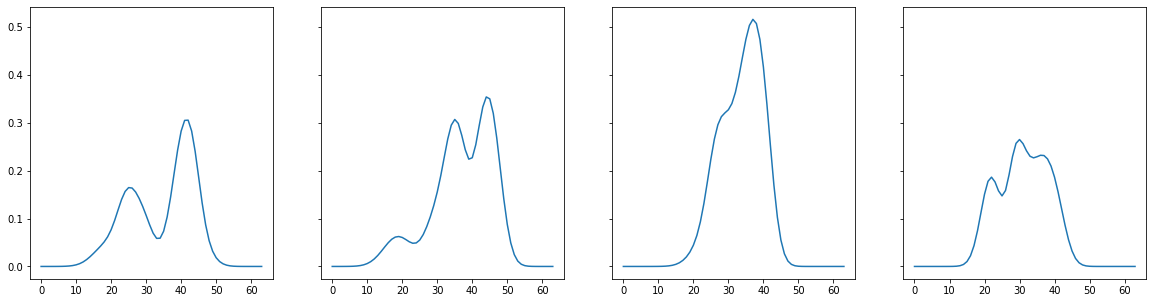

In [20]:
sim.fiber_real_sim(gaus_data[0]);

In [25]:
file = h5py.File('data/video/pressure/train/train_gaus.hdf5', 'w')

In [26]:
file.create_dataset('100_000 gausses, n=7', data=gaus_data, **hdf5plugin.Blosc(cname='blosclz', clevel=4, shuffle=hdf5plugin.Blosc.SHUFFLE))

<HDF5 dataset "100_000 gausses, n=7": shape (100000, 64, 64), type "<f4">

In [27]:
file.close()

In [5]:
video_file = h5py.File("data/video/pressure/train/train_videos.hdf5", mode='a')

In [8]:
keys = list(video_file.keys())
print(len(keys))
for key in keys[-300:]:
    del video_file[key]

11136


In [9]:
keys = list(video_file.keys())
print(len(keys))

10836


In [10]:
video_file.close()